# Importing neccessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Displaying Uninfected and Infected Cell tissues

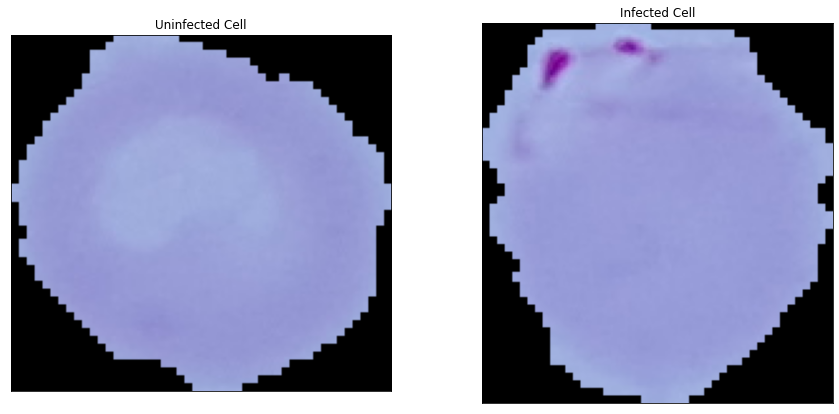

In [3]:
import cv2

upic=r'C:\Users\Hannah\Desktop\DL_projecT\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_131.png'
apic=r'C:\Users\Hannah\Desktop\DL_projecT\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_164.png'
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(upic))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(apic))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [4]:
width = 128
height = 128

# Dividing Dataset into two folders train and test

In [5]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

# Preparing train and test Image Generator

In [6]:
trainDatagen = datagen.flow_from_directory(directory=r'C:\Users\Hannah\Desktop\DL_projecT\cell_images\cell_images',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [7]:
valDatagen = datagen.flow_from_directory(directory= r'C:\Users\Hannah\Desktop\DL_projecT\cell_images\cell_images',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


# Preparing the model

In [1]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(50,50,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(4,4),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.1))

model.add(Conv2D(512,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1,activation="softmax"))

NameError: name 'Sequential' is not defined

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [18]:
history = model.fit_generator(generator = trainDatagen,
                             steps_per_epoch = len(trainDatagen),
                              epochs =20,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen),
                             callbacks=[early_stop])

Epoch 1/20
1378/1378 [==============================] - ETA: 0s - loss: 7.6247 - accuracy: 0.5000

KeyboardInterrupt: 

# Plots

In [17]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

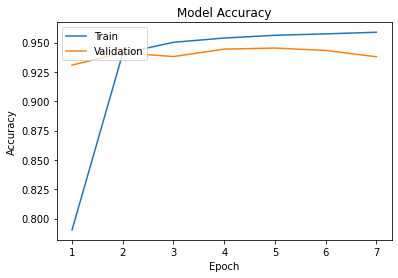

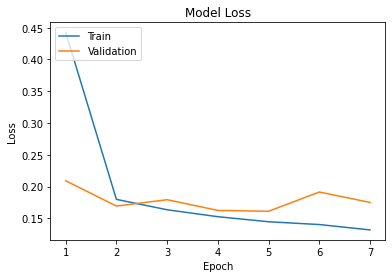

In [18]:
plotLearningCurve(history,7)

In [ ]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

#creating confusion matrix
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
# plotting confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()